In [2]:
# import the libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\marc-\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
# import the data
df_path = r"C:\Users\marc-\OneDrive\Bureau\ML4FIN\sentiment-analysis\dataset_twitter\human_distil_vader_labeled.parquet"
df = pd.read_parquet(df_path)

df.head(10)

,Date,text,Sentiment,distil_sentiment,distil_sentiment confidence,sentiment_score_VADER,Sentiment_VADER,ground_truth,distil_pred,vader_pred
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...,Positive,NEGATIVE,0.986784,0.0000,positive,1,0,1
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...,Positive,NEGATIVE,0.996797,-0.1027,negative,1,0,0
2,2019-05-27,Another Test tweet that wasn't caught in the s...,Positive,NEGATIVE,0.997773,0.0000,positive,1,0,1
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,Positive,NEGATIVE,0.992891,0.0000,positive,1,0,1
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,Positive,NEGATIVE,0.999315,0.3612,positive,1,0,1
5,2019-05-27,#btc inceldiği yerden kopsun bakalım 17:00 ye ...,Positive,NEGATIVE,0.978376,0.0000,positive,1,0,1
6,2019-05-27,@nwoodfine We have been building on the real #...,Positive,NEGATIVE,0.998634,-0.4767,negative,1,0,0
7,2019-05-27,"@pedronauck como investidor, vc é um ótimo dev...",Positive,NEGATIVE,0.987598,-0.1027,negative,1,0,0
8,2019-05-27,ブラジルはまぁ置いといてもドイツは存在感出してくるのかな。ロシアもマイニングなどで元気になる...,Positive,NEGATIVE,0.959524,0.0000,positive,1,0,1
9,2019-05-27,"CHANGE IS COMING...GET READY!!! Boom, Another ...",Positive,NEGATIVE,0.979315,0.7422,positive,1,0,1


**VADER**

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [13]:
#function to get the sentiment score
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

In [14]:
df['sentiment_score_VADER'] = df['text'].apply(get_sentiment_score)

In [9]:
df.head(100)

,Date,text,Sentiment,distil_sentiment,distil_sentiment confidence,sentiment_score_VADER,Sentiment_VADER,ground_truth,distil_pred,vader_pred
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...,Positive,NEGATIVE,0.986784,0.0000,positive,1,0,1
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...,Positive,NEGATIVE,0.996797,-0.1027,negative,1,0,0
2,2019-05-27,Another Test tweet that wasn't caught in the s...,Positive,NEGATIVE,0.997773,0.0000,positive,1,0,1
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,Positive,NEGATIVE,0.992891,0.0000,positive,1,0,1
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,Positive,NEGATIVE,0.999315,0.3612,positive,1,0,1
...,...,...,...,...,...,...,...,...,...,...
95,2019-05-27,Belensay ÇİN de yaşamıyor..\n\nÇİN deki GÜNDEM...,Positive,NEGATIVE,0.981917,0.0000,positive,1,0,1
96,2019-05-27,Win + ❤️ https://t.co/3vfzboSaad,Positive,NEGATIVE,0.965225,0.5859,positive,1,0,1
97,2019-05-27,Bitcoin prices hit $150 billion market cap for...,Positive,NEGATIVE,0.993578,0.0000,positive,1,0,1
98,2019-05-27,焼けた笑\nさすがBTC頭おかしい…笑,Positive,NEGATIVE,0.924786,0.0000,positive,1,0,1


In [16]:
# create a function to get the sentiment as positive or negative
def getSentiment(score):
    if score < 0:
        return "negative"
    else:
        return "positive"

In [17]:
# create a column to store the text sentiment
df['Sentiment_VADER'] = df['sentiment_score_VADER'].apply(getSentiment)
# show the data
df.head(100)

,Date,text,Sentiment,distil_sentiment,distil_sentiment confidence,sentiment_score_VADER,Sentiment_VADER,ground_truth,distil_pred,vader_pred
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...,Positive,NEGATIVE,0.986784,0.0000,positive,1,0,0
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...,Positive,NEGATIVE,0.996797,-0.1027,negative,1,0,0
2,2019-05-27,Another Test tweet that wasn't caught in the s...,Positive,NEGATIVE,0.997773,0.0000,positive,1,0,0
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,Positive,NEGATIVE,0.992891,0.0000,positive,1,0,0
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,Positive,NEGATIVE,0.999315,0.3612,positive,1,0,1
...,...,...,...,...,...,...,...,...,...,...
95,2019-05-27,Belensay ÇİN de yaşamıyor..\n\nÇİN deki GÜNDEM...,Positive,NEGATIVE,0.981917,0.0000,positive,1,0,0
96,2019-05-27,Win + ❤️ https://t.co/3vfzboSaad,Positive,NEGATIVE,0.965225,0.5859,positive,1,0,1
97,2019-05-27,Bitcoin prices hit $150 billion market cap for...,Positive,NEGATIVE,0.993578,0.0000,positive,1,0,0
98,2019-05-27,焼けた笑\nさすがBTC頭おかしい…笑,Positive,NEGATIVE,0.924786,0.0000,positive,1,0,0


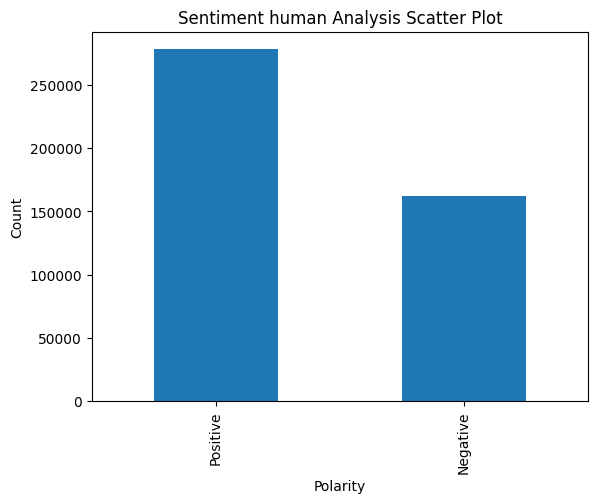

In [18]:
# create a bar chart to show the cout of Positive, Neutral and Negative sentiments
df['Sentiment'].value_counts().plot(kind="bar")
plt.title("Sentiment human Analysis Scatter Plot")
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.show()

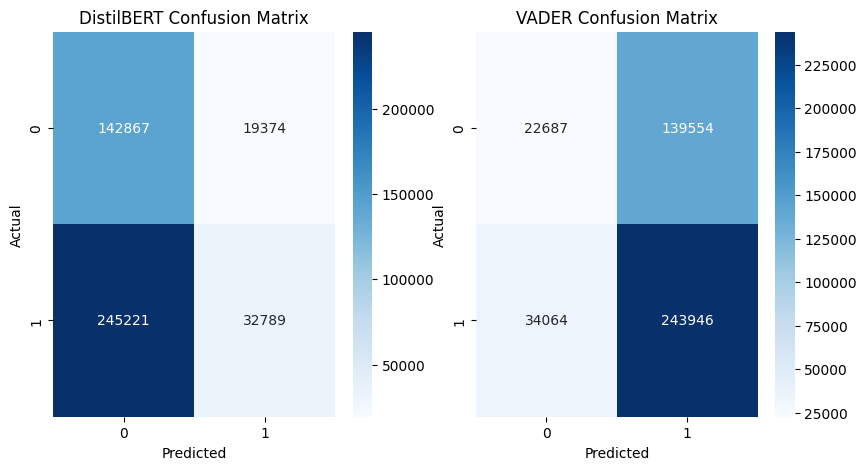

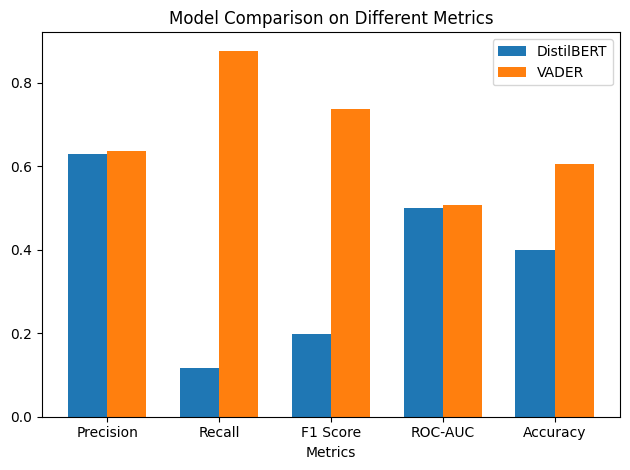

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Map string sentiments to binary for comparison
mapping = {'Positive': 1, 'Negative': 0}
vader_mapping = {'positive': 1, 'negative': 0}
distil_mapping = {'POSITIVE': 1, 'NEGATIVE': 0}

df['ground_truth'] = df['Sentiment'].map(mapping)
df['distil_pred'] = df['distil_sentiment'].map(distil_mapping)
df['vader_pred'] = df['Sentiment_VADER'].map(vader_mapping)

# Calculate confusion matrices and accuracies
cm_distil = confusion_matrix(df['ground_truth'], df['distil_pred'])
cm_vader = confusion_matrix(df['ground_truth'], df['vader_pred'])
acc_distil = accuracy_score(df['ground_truth'], df['distil_pred'])
acc_vader = accuracy_score(df['ground_truth'], df['vader_pred'])

# Additional metrics
precision_distil = precision_score(df['ground_truth'], df['distil_pred'])
recall_distil = recall_score(df['ground_truth'], df['distil_pred'])
f1_distil = f1_score(df['ground_truth'], df['distil_pred'])
roc_auc_distil = roc_auc_score(df['ground_truth'], df['distil_pred'])

precision_vader = precision_score(df['ground_truth'], df['vader_pred'])
recall_vader = recall_score(df['ground_truth'], df['vader_pred'])
f1_vader = f1_score(df['ground_truth'], df['vader_pred'])
roc_auc_vader = roc_auc_score(df['ground_truth'], df['vader_pred'])

# Plotting confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(cm_distil, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('DistilBERT Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_vader, annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('VADER Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.show()

# Metrics for models
metrics = ['Precision', 'Recall', 'F1 Score', 'ROC-AUC', 'Accuracy']
distil_values = [precision_distil, recall_distil, f1_distil, roc_auc_distil, acc_distil]
vader_values = [precision_vader, recall_vader, f1_vader, roc_auc_vader, acc_vader]

# Visualize all metrics
x = list(range(len(metrics)))  # Convert range to list for arithmetic operations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar([xi - width/2 for xi in x], distil_values, width, label='DistilBERT')
rects2 = ax.bar([xi + width/2 for xi in x], vader_values, width, label='VADER')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Model Comparison on Different Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

In [26]:
# Save the updated DataFrame back to a Parquet file
df.to_parquet('dataset_twitter/human_distil_vader_labeled.parquet')

## **TEXTBLOB**

In [6]:
%pip install textblob

In [7]:
from textblob import TextBlob

In [8]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

def custom_sentiment(polarity):
    if polarity > 0:  # Consider any positive polarity as positive sentiment
        return 'positive'
    else:  # Consider zero and negative polarity as negative sentiment
        return 'negative'

# Assuming your DataFrame is named df and the column with text is named 'text'
df['TextBlob_Polarity'], df['TextBlob_Subjectivity'] = zip(*df['text'].apply(analyze_sentiment))
# Apply the custom sentiment function to your polarity data
df['Custom_Sentiment_textblob'] = df['TextBlob_Polarity'].apply(custom_sentiment)

# Display the updated DataFrame with the sentiment scores
df.head(100)

,Date,text,Sentiment,distil_sentiment,distil_sentiment confidence,sentiment_score_VADER,Sentiment_VADER,ground_truth,distil_pred,vader_pred,TextBlob_Polarity,TextBlob_Subjectivity,Custom_Sentiment_textblob
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...,Positive,NEGATIVE,0.986784,0.0000,positive,1,0,1,0.00,0.000000,negative
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...,Positive,NEGATIVE,0.996797,-0.1027,negative,1,0,0,0.00,0.000000,negative
2,2019-05-27,Another Test tweet that wasn't caught in the s...,Positive,NEGATIVE,0.997773,0.0000,positive,1,0,1,0.00,0.000000,negative
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,Positive,NEGATIVE,0.992891,0.0000,positive,1,0,1,0.00,0.400000,negative
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,Positive,NEGATIVE,0.999315,0.3612,positive,1,0,1,0.00,0.000000,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-05-27,Belensay ÇİN de yaşamıyor..\n\nÇİN deki GÜNDEM...,Positive,NEGATIVE,0.981917,0.0000,positive,1,0,1,0.00,0.000000,negative
96,2019-05-27,Win + ❤️ https://t.co/3vfzboSaad,Positive,NEGATIVE,0.965225,0.5859,positive,1,0,1,0.80,0.400000,positive
97,2019-05-27,Bitcoin prices hit $150 billion market cap for...,Positive,NEGATIVE,0.993578,0.0000,positive,1,0,1,0.25,0.333333,positive
98,2019-05-27,焼けた笑\nさすがBTC頭おかしい…笑,Positive,NEGATIVE,0.924786,0.0000,positive,1,0,1,0.00,0.000000,negative


In [13]:
def Sentiment_to_pred(text):
    if text=='positive':
        return 1
    if text=='negative':
        return 0
    else:
        print("invalid")
        
df['textblob_pred'] = df['Custom_Sentiment_textblob'].apply(Sentiment_to_pred)
df.head(10)


,Date,text,Sentiment,distil_sentiment,distil_sentiment confidence,sentiment_score_VADER,Sentiment_VADER,ground_truth,distil_pred,vader_pred,TextBlob_Polarity,TextBlob_Subjectivity,Custom_Sentiment_textblob,textblob_pred
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...,Positive,NEGATIVE,0.986784,0.0000,positive,1,0,1,0.00,0.00,negative,0
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...,Positive,NEGATIVE,0.996797,-0.1027,negative,1,0,0,0.00,0.00,negative,0
2,2019-05-27,Another Test tweet that wasn't caught in the s...,Positive,NEGATIVE,0.997773,0.0000,positive,1,0,1,0.00,0.00,negative,0
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,Positive,NEGATIVE,0.992891,0.0000,positive,1,0,1,0.00,0.40,negative,0
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,Positive,NEGATIVE,0.999315,0.3612,positive,1,0,1,0.00,0.00,negative,0
5,2019-05-27,#btc inceldiği yerden kopsun bakalım 17:00 ye ...,Positive,NEGATIVE,0.978376,0.0000,positive,1,0,1,0.00,0.00,negative,0
6,2019-05-27,@nwoodfine We have been building on the real #...,Positive,NEGATIVE,0.998634,-0.4767,negative,1,0,0,-0.10,0.35,negative,0
7,2019-05-27,"@pedronauck como investidor, vc é um ótimo dev...",Positive,NEGATIVE,0.987598,-0.1027,negative,1,0,0,0.05,1.00,positive,1
8,2019-05-27,ブラジルはまぁ置いといてもドイツは存在感出してくるのかな。ロシアもマイニングなどで元気になる...,Positive,NEGATIVE,0.959524,0.0000,positive,1,0,1,0.00,0.00,negative,0
9,2019-05-27,"CHANGE IS COMING...GET READY!!! Boom, Another ...",Positive,NEGATIVE,0.979315,0.7422,positive,1,0,1,1.00,0.50,positive,1


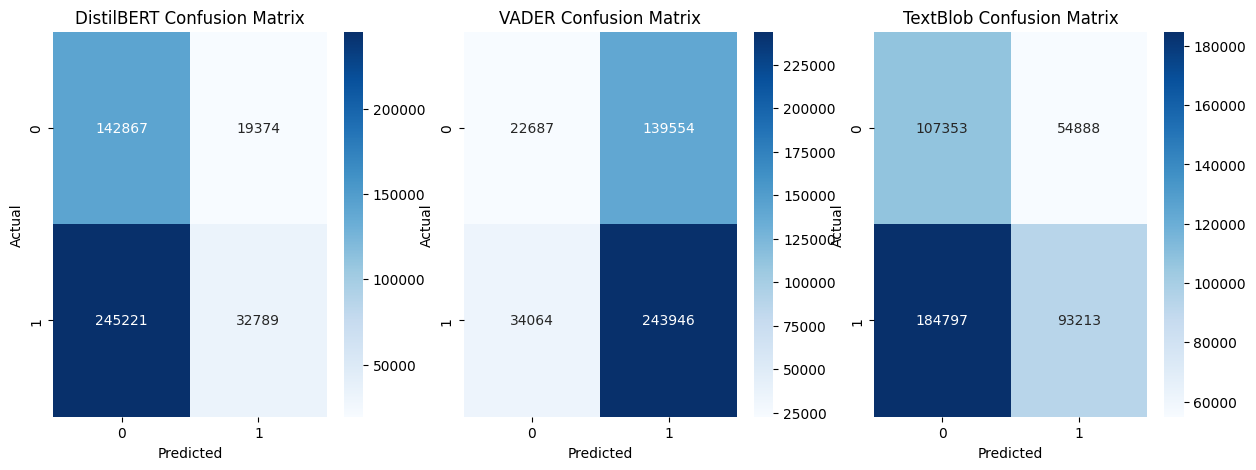

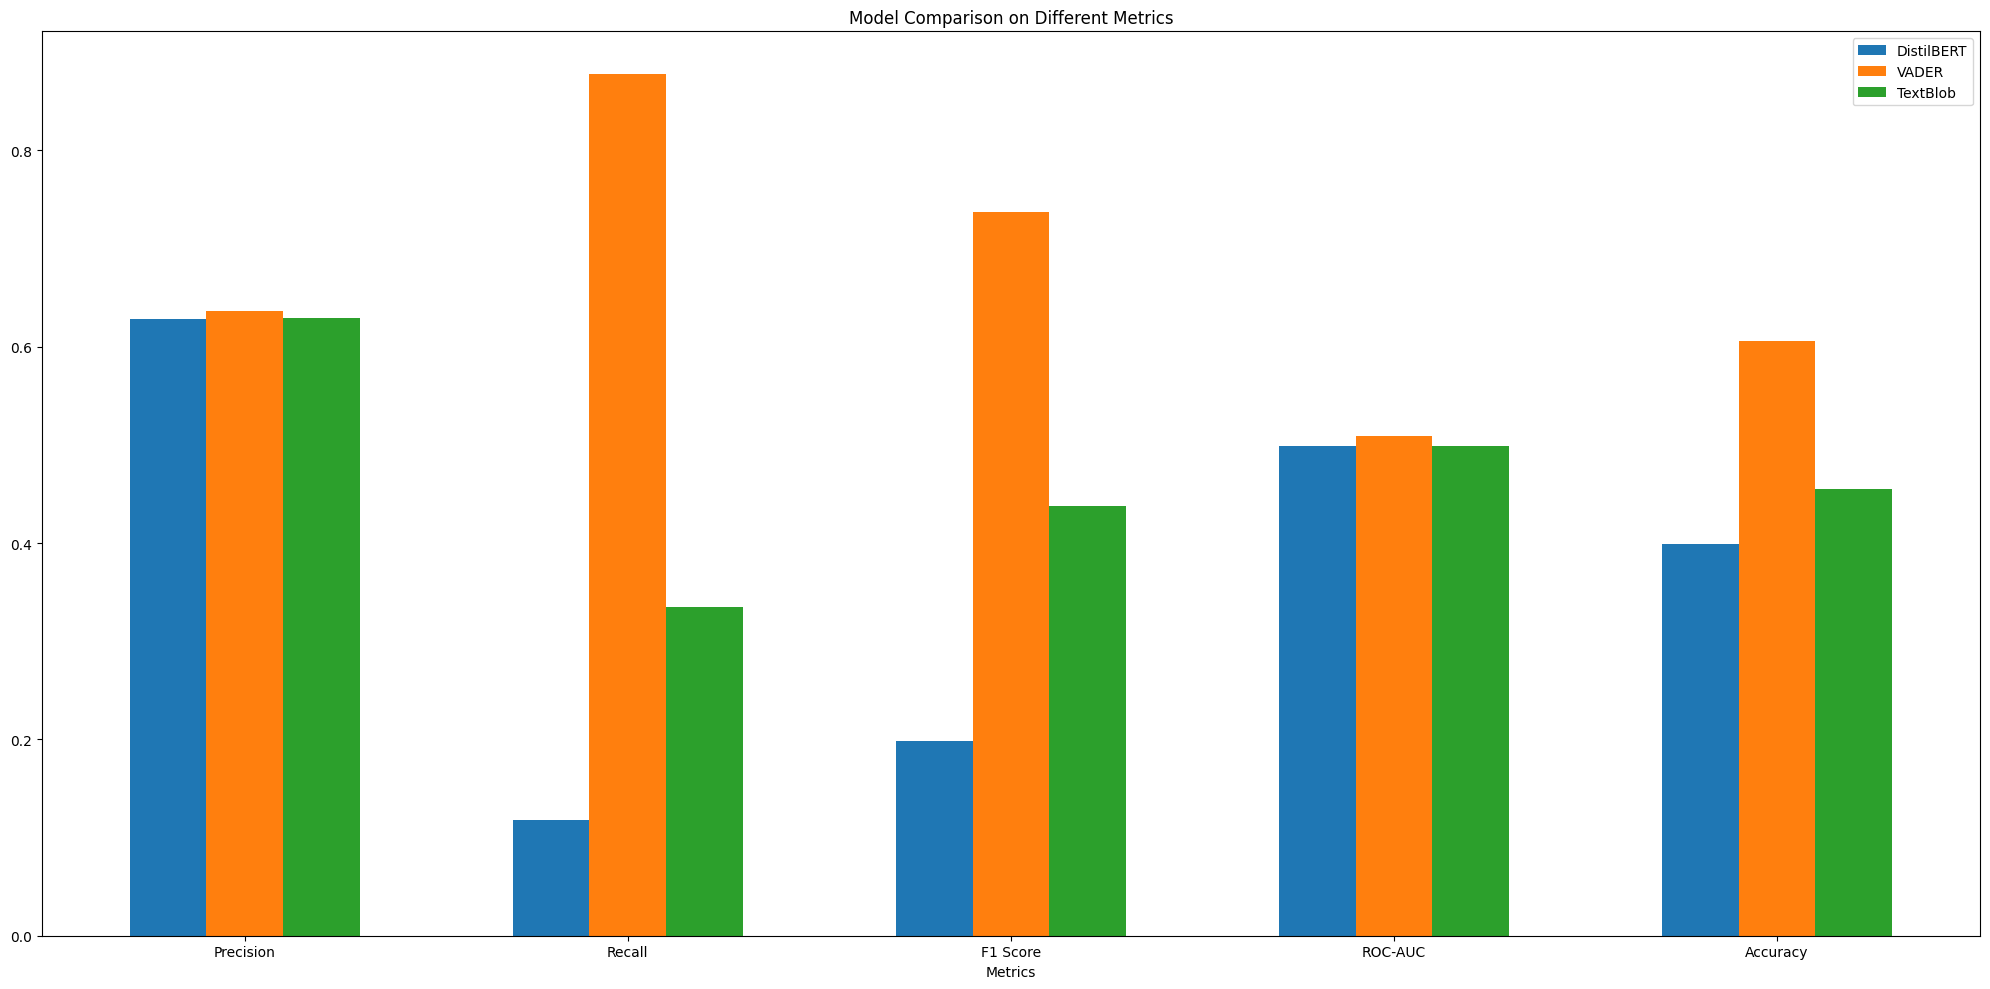

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming df is your DataFrame and the columns are properly named and mapped.

# Calculate confusion matrices and accuracies
cm_distil = confusion_matrix(df['ground_truth'], df['distil_pred'])
cm_vader = confusion_matrix(df['ground_truth'], df['vader_pred'])
cm_textblob = confusion_matrix(df['ground_truth'], df['textblob_pred'])

acc_distil = accuracy_score(df['ground_truth'], df['distil_pred'])
acc_vader = accuracy_score(df['ground_truth'], df['vader_pred'])
acc_textblob = accuracy_score(df['ground_truth'], df['textblob_pred'])

# Additional metrics
precision_distil = precision_score(df['ground_truth'], df['distil_pred'])
recall_distil = recall_score(df['ground_truth'], df['distil_pred'])
f1_distil = f1_score(df['ground_truth'], df['distil_pred'])
roc_auc_distil = roc_auc_score(df['ground_truth'], df['distil_pred'])

precision_vader = precision_score(df['ground_truth'], df['vader_pred'])
recall_vader = recall_score(df['ground_truth'], df['vader_pred'])
f1_vader = f1_score(df['ground_truth'], df['vader_pred'])
roc_auc_vader = roc_auc_score(df['ground_truth'], df['vader_pred'])

precision_textblob = precision_score(df['ground_truth'], df['textblob_pred'])
recall_textblob = recall_score(df['ground_truth'], df['textblob_pred'])
f1_textblob = f1_score(df['ground_truth'], df['textblob_pred'])
roc_auc_textblob = roc_auc_score(df['ground_truth'], df['textblob_pred'])

# Plotting confusion matrices
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Adjust the figure size to fit all subplots
sns.heatmap(cm_distil, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('DistilBERT Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_vader, annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('VADER Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

sns.heatmap(cm_textblob, annot=True, fmt='d', ax=ax[2], cmap='Blues')
ax[2].set_title('TextBlob Confusion Matrix')
ax[2].set_xlabel('Predicted')
ax[2].set_ylabel('Actual')

# Metrics for models
metrics = ['Precision', 'Recall', 'F1 Score', 'ROC-AUC', 'Accuracy']
distil_values = [precision_distil, recall_distil, f1_distil, roc_auc_distil, acc_distil]
vader_values = [precision_vader, recall_vader, f1_vader, roc_auc_vader, acc_vader]
textblob_values = [precision_textblob, recall_textblob, f1_textblob, roc_auc_textblob, acc_textblob]

# Adjust the x positions to prevent bar overlap
width = 0.2  # Adjust the width of the bars
x = list(range(len(metrics)))  # the label locations
fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar([xi - width for xi in x], distil_values, width, label='DistilBERT')
rects2 = ax.bar([xi for xi in x], vader_values, width, label='VADER')
rects3 = ax.bar([xi + width for xi in x], textblob_values, width, label='TextBlob')

# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Model Comparison on Different Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

In [16]:
# Save the updated DataFrame back to a Parquet file
df.to_parquet('dataset_twitter/human_distil_vader_textblob_labeled.parquet')

## **DISTIL BERT**

In [17]:
##%pip install transformers torch

In [21]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.nn.functional import softmax
import torch

# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# Function to predict sentiment
def get_sentiment_distilbert(text):
    # Tokenize the text and prepare input IDs
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    # Get model predictions
    with torch.no_grad():
        logits = model(**inputs).logits
    # Calculate probabilities
    probs = softmax(logits, dim=-1)
    # Get the sentiment: index of the highest probability
    sentiment = torch.argmax(probs, dim=-1)
    # Map index to sentiment
    return 'positive' if sentiment.item() == 1 else 'negative'


In [22]:
df['Sentiment_distilbert'] = df['text'].apply(get_sentiment_distilbert)

KeyboardInterrupt: 

In [ ]:
#create a bar chart to show the cout of Positive, Neutral and Negative sentiments
df['Sentiment_distilbert'].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.show()

**DISTILBERT RESULT PROCESS**

In [6]:
data= pd.read_parquet(r'C:\Users\marc-\OneDrive\Bureau\ML4FIN\sentiment-analysis\distilbert_part4.parquet')
data

,title,text,date,user_followers,number_of_comments,distil_sentiment confidence,platform,MixedTEXT,sentiment_score,sentiment_class,label,score
925431,_,"MicroStrategy Performance \nSep. 09, 2021\n\nS...",2021-09-10 12:00:03,57265.0,_,_,X,"_ MicroStrategy Performance \nSep. 09, 2021\n\...",0.2023,positive,None,NaN
925432,_,One Bitcoin now worth $46337.08@bitstamp. High...,2021-09-10 12:00:03,4100.0,_,_,X,_ One Bitcoin now worth $46337.08@bitstamp. Hi...,-0.0516,negative,None,NaN
925433,_,One Bitcoin now worth $46343.882. Market Cap $...,2021-09-10 12:00:03,4100.0,_,_,X,_ One Bitcoin now worth $46343.882. Market Cap...,0.2263,positive,None,NaN
925434,_,One Bitcoin now worth $46337.08@bitstamp. High...,2021-09-10 12:00:03,4100.0,_,_,X,_ One Bitcoin now worth $46337.08@bitstamp. Hi...,-0.0516,negative,None,NaN
925435,_,The #Altcoin Market Also Dumped Together With ...,2021-09-10 12:00:00,12318.0,_,_,X,_ The #Altcoin Market Also Dumped Together Wit...,0.2714,positive,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
308469,None,None,None,None,None,None,None,None,NaN,None,POSITIVE,0.999673
308470,None,None,None,None,None,None,None,None,NaN,None,NEGATIVE,0.990637
308471,None,None,None,None,None,None,None,None,NaN,None,NEGATIVE,0.979478
308472,None,None,None,None,None,None,None,None,NaN,None,NEGATIVE,0.999107


In [7]:
split_index = len(data) // 2
df1 = data.iloc[:split_index]
df2 = data.iloc[split_index:]
df1 = df1.iloc[:,:-2]
df2 = df2.iloc[:, -2:]
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result['label'].isna().sum()
result

,title,text,date,user_followers,number_of_comments,distil_sentiment confidence,platform,MixedTEXT,sentiment_score,sentiment_class,label,score
0,_,"MicroStrategy Performance \nSep. 09, 2021\n\nS...",2021-09-10 12:00:03,57265.0,_,_,X,"_ MicroStrategy Performance \nSep. 09, 2021\n\...",0.2023,positive,NEGATIVE,0.996046
1,_,One Bitcoin now worth $46337.08@bitstamp. High...,2021-09-10 12:00:03,4100.0,_,_,X,_ One Bitcoin now worth $46337.08@bitstamp. Hi...,-0.0516,negative,NEGATIVE,0.998396
2,_,One Bitcoin now worth $46343.882. Market Cap $...,2021-09-10 12:00:03,4100.0,_,_,X,_ One Bitcoin now worth $46343.882. Market Cap...,0.2263,positive,NEGATIVE,0.996649
3,_,One Bitcoin now worth $46337.08@bitstamp. High...,2021-09-10 12:00:03,4100.0,_,_,X,_ One Bitcoin now worth $46337.08@bitstamp. Hi...,-0.0516,negative,NEGATIVE,0.998412
4,_,The #Altcoin Market Also Dumped Together With ...,2021-09-10 12:00:00,12318.0,_,_,X,_ The #Altcoin Market Also Dumped Together Wit...,0.2714,positive,NEGATIVE,0.992515
...,...,...,...,...,...,...,...,...,...,...,...,...
308469,"It’s January 1st, 2020 and the best Chinese fo...",None,2020-01-01 21:48:30,_,6,15,reddit,"It’s January 1st, 2020 and the best Chinese fo...",0.7579,positive,POSITIVE,0.999673
308470,"At today rate 43,500 BTC were traded during 20...","Hi guys, me reporting again. Happy new year!\n...",2020-01-01 20:19:23,_,27,82,reddit,"At today rate 43,500 BTC were traded during 20...",0.8886,positive,NEGATIVE,0.990637
308471,"I'm donating 10,000 MKR to establish a Web3/De...",None,2020-01-01 20:09:11,_,24,106,reddit,"I'm donating 10,000 MKR to establish a Web3/De...",0.4019,positive,NEGATIVE,0.979478
308472,$dai type slp token,I've been using USDH SLP tokens when I want to...,2020-01-01 16:34:59,_,7,26,reddit,$dai type slp token I've been using USDH SLP t...,0.8765,positive,NEGATIVE,0.999107


In [8]:
result.to_parquet(r'C:\Users\marc-\OneDrive\Bureau\ML4FIN\sentiment-analysis\distil_p4.parquet')